## TODO
- [] create wordcloud for udid dataset
- [] use seaborn for plots

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_a = pd.read_csv("../datasets/1_india_disability.csv")

df_a.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df_a.shape[0],df_a.shape[1]))

print("There are {} area names in this dataset such as {}... \n".format(len(df_a["Area Name"].unique()),
                                                                           ", ".join(df_a["Area Name"].unique()[0:5])))

print("There are {} disability groups in this dataset such as {}... \n".format(len(df_a["Disability"].unique()),
                                                                                      ", ".join(df_a["Disability"].unique()[0:5])))

There are 4860 observations and 14 features in this dataset. 

There are 36 area names in this dataset such as INDIA, JAMMU & KASHMIR, HIMACHAL PRADESH, PUNJAB, CHANDIGARH... 

There are 9 disability groups in this dataset such as Total, In-Seeing, In-Hearing, In-Speech, In-Movement... 



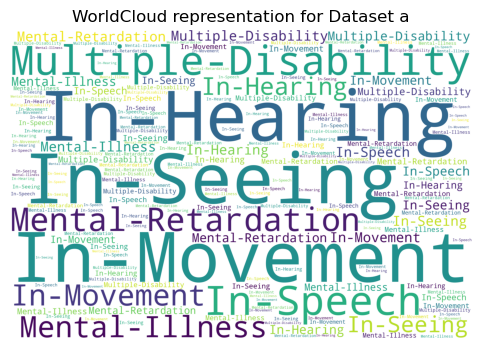

In [60]:
# df = df[["Area Name",  "Total disabled population - Persons"]]
disability_counts = df_a.groupby('Disability')['Total disabled population - Persons'].sum().reset_index()

disability_counts = disability_counts[disability_counts["Disability"]!='Total']
disability_counts = disability_counts[disability_counts["Disability"]!='Any-Other']
disability_counts

disability_dict = {row['Disability']: row['Total disabled population - Persons'] for index, row in disability_counts.iterrows()}
wc = WordCloud(width=2400, height=1600, repeat=True, prefer_horizontal=1, background_color='white')
wordcloud  = wc.generate_from_frequencies(disability_dict)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud)
plt.title("WorldCloud representation for Dataset a")
plt.axis('off')
plt.savefig('wc_dst_a.png', dpi=600, bbox_inches='tight')
plt.show()



In [7]:
# Convert the DataFrame to a dictionary for WordCloud
disability_dict = {row['Disability']: row['Total disabled population - Persons'] for index, row in disability_counts.iterrows()}


In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disability_dict)


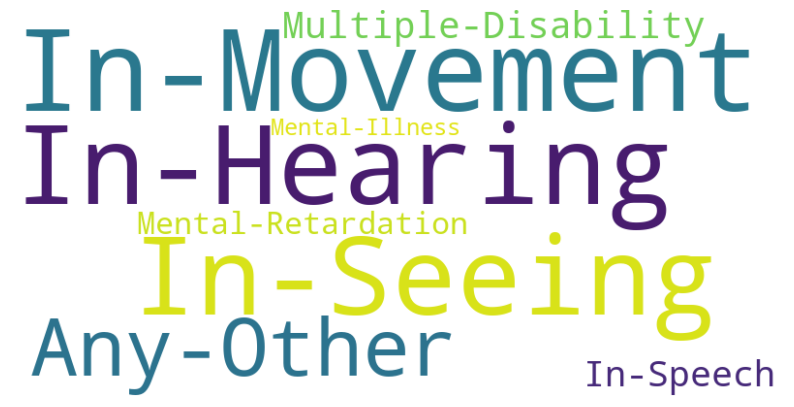

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Grouping data by State
grouped_by_state = df.groupby('Area Name')

# Generating word cloud for each state
# for state, data in grouped_by_state:
#     # Aggregate the counts for each disability type in the state
#     state_disability_counts = data.groupby('Disability')['Total disabled population - Persons'].sum().reset_index()
    
#     # Convert the DataFrame to a dictionary for WordCloud
#     disability_dict = {row['Disability']: row['Total disabled population - Persons'] for index, row in state_disability_counts.iterrows()}

#     # Create the WordCloud object
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disability_dict)

#     # Display the WordCloud with the state name as title
#     plt.figure(figsize=(10, 8))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f"Word Cloud for {state}")
#     plt.axis('off')
#     plt.show()

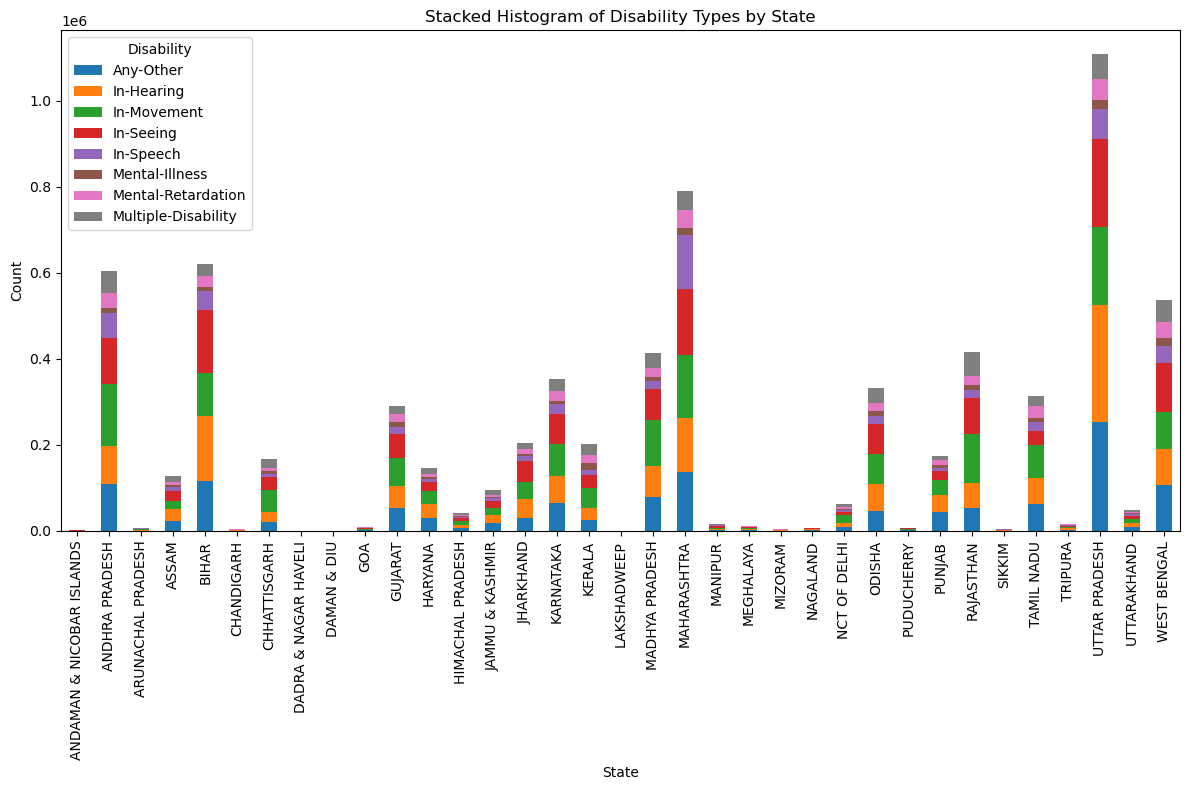

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'

filtered_data = df[(df['Disability'] != 'Total') & (df['Area Name'] != 'INDIA')]
# Pivot the data to have Disability_Type as columns and State as index with Count as values
pivot_data = filtered_data.pivot_table(index='Area Name', columns='Disability', values='Total disabled population - Persons', fill_value=0)

# Plotting a stacked histogram
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Histogram of Disability Types by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Disability')
plt.tight_layout()
plt.show()


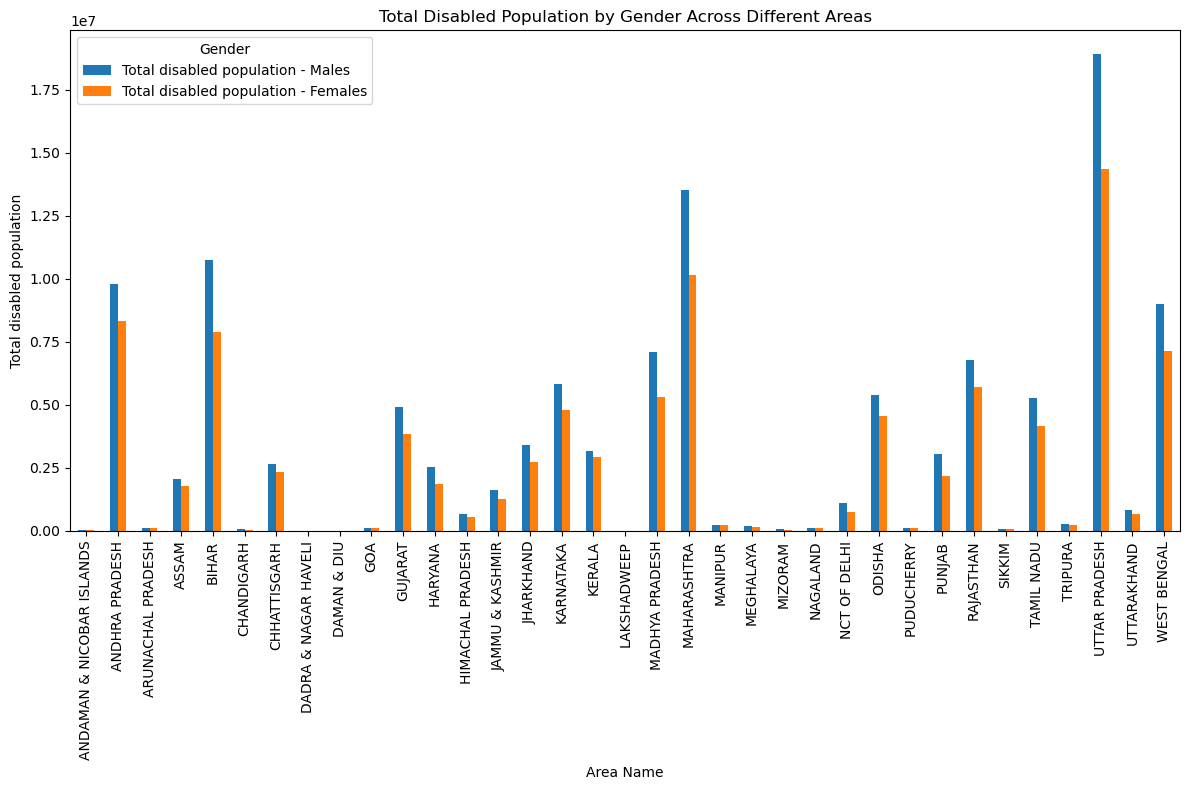

In [ ]:
filtered_data = df[['Area Name', 'Total disabled population - Males', 'Total disabled population - Females']]
# Filter out rows where Area Name is not 'INDIA' and aggregate the sum of disabled population by area
filtered_data = filtered_data[filtered_data['Area Name'] != 'INDIA']
grouped_data = filtered_data.groupby('Area Name').sum()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.title('Total Disabled Population by Gender Across Different Areas')
plt.xlabel('Area Name')
plt.ylabel('Total disabled population')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

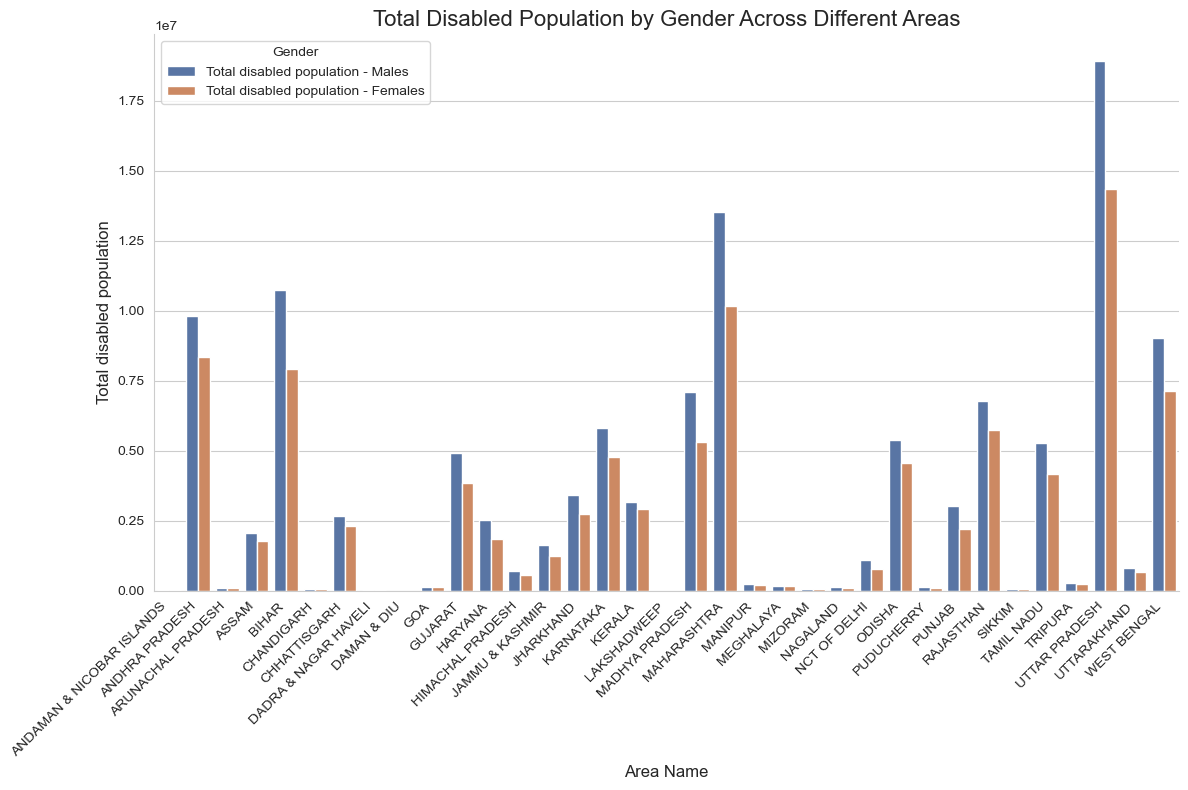

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a DataFrame named 'df'

# Filter data for specific columns
filtered_data = df[['Area Name', 'Total disabled population - Males', 'Total disabled population - Females']]

# Filter out rows where Area Name is not 'INDIA' and aggregate the sum of disabled population by area
filtered_data = filtered_data[filtered_data['Area Name'] != 'INDIA']
grouped_data = filtered_data.groupby('Area Name').sum().reset_index()

# Reshape the data for Seaborn's barplot
melted_data = grouped_data.melt(id_vars='Area Name', var_name='Gender', value_name='Total disabled population')

# Set a custom color palette
custom_palette = ["#4c72b0", "#dd8452"]

# Set a Seaborn style
sns.set_style("whitegrid")

# Plotting the grouped bar chart using Seaborn with adjusted styling
plt.figure(figsize=(12, 8))
sns.barplot(x='Area Name', y='Total disabled population', hue='Gender', data=melted_data, palette=custom_palette)
plt.title('Total Disabled Population by Gender Across Different Areas', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Total disabled population', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout()
sns.despine()
plt.show()


In [10]:
# Reading the Dataset
df_b = pd.read_csv("../datasets/2_udid_data.csv")

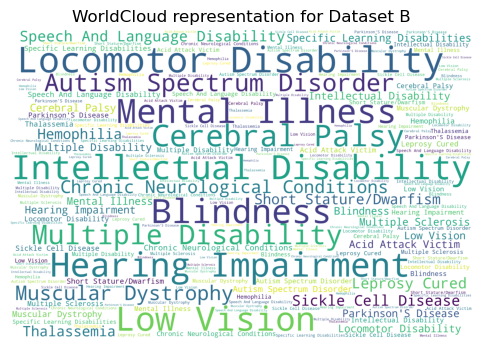

In [58]:
df_b['disability_type'].unique()

disability_counts_b = df_b.groupby('disability_type')['total'].sum().reset_index()
disability_dict = {row['disability_type']: row['total'] for index, row in disability_counts_b.iterrows()}
wc = WordCloud(width=2400, height=1600, repeat=True, prefer_horizontal=1, background_color='white')
wordcloud  = wc.generate_from_frequencies(disability_dict)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud)
plt.title("WorldCloud representation for Dataset B")
plt.axis('off')
plt.savefig('wc_dst_b.png', dpi=600, bbox_inches='tight')
plt.show()

